In [3]:
import os
os.chdir("C:\\Users\\RAJA  IIT\\Desktop")


In [ ]:
nltk.download()

# Amazon Fine Foods Review Dataset, modelling with 10,000 instances from each score label

In [54]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
%matplotlib inline
sns.set(style="white", palette="muted")
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score
from sklearn import metrics

In [5]:
df=pd.read_csv('Reviews.csv')

In [6]:
df=df[['Text','Summary','Score']]

In [7]:
df.head()

,Text,Summary,Score
0,I have bought several of the Vitality canned d...,Good Quality Dog Food,5
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,1
2,This is a confection that has been around a fe...,"""Delight"" says it all",4
3,If you are looking for the secret ingredient i...,Cough Medicine,2
4,Great taffy at a great price. There was a wid...,Great taffy,5


In [8]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [9]:
def sampling_dataset(df):
    count = 50000
    class_df_sampled = pd.DataFrame(columns = ["Score","Summary"])
    temp = []
    random_indexes = np.random.choice(df.index, count, replace=False,)
    temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled,each_df],axis=0)
    
    return class_df_sampled

df = sampling_dataset(df)
df.reset_index(drop=True,inplace=True)

In [10]:
df.shape

(50000, 3)

In [11]:
df.Score.value_counts()

5.0    31883
4.0     7149
1.0     4612
3.0     3705
2.0     2651
Name: Score, dtype: int64

In [12]:
df.Score=df.Score.apply(lambda x: 'pos' if x>3 else 'neg')

In [13]:
df.head()

,Score,Summary,Text
0,pos,Libby's Splenda Fruit Cocktail,Thank you canned fruit industry for coming out...
1,pos,Fantastic aroma and taste!,I purchased this lavender to make lavender lem...
2,pos,My parrots LOVE Harrison's,"I swear by Harrison's bird foods, including th..."
3,neg,Crumbles easily,My golden loves to chew and hence this was the...
4,pos,Healthy and Happy,We adopted a mix breed that was approx 1 year ...


In [14]:
df.Score.value_counts()

pos    39032
neg    10968
Name: Score, dtype: int64

In [15]:
#df.Score.map({'pos':1,'neg'})

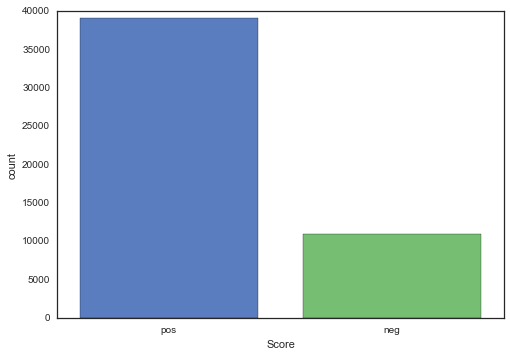

In [16]:
sns.countplot(x='Score',data=df)

In [17]:
df.columns

Index(['Score', 'Summary', 'Text'], dtype='object')

In [18]:
df=df[['Score', 'Summary']]

In [19]:
stop=stopwords.words('english')

In [20]:
len(stop)

153

In [21]:
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))
def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        if(t not in stop):
            
            stemmed = lemmatizer.lemmatize(t)
            tokens.append(stemmed)
    return ' '.join(tokens)

In [22]:
A=[]
for p in df['Summary']:
    A.append(preprocessing(str(p)))
    

In [23]:
A

['libby splenda fruit cocktail',
 'fantastic aroma taste',
 'parrot love harrison',
 'crumbles easily',
 'healthy happy',
 'terrible disgusting',
 'delicious nutritious',
 'must',
 'big',
 'diet cola taste horrible',
 'excelent',
 'love chip thick crunchy',
 'smell good taste',
 'sure treasure',
 'much cheap',
 'tasty',
 'dog spoken great treat',
 'difference taste',
 'manufacturer changed formula',
 'great idea hold salt please',
 'yum ginger lover',
 'nice pretty',
 'excellent product made shipping buy store',
 'great product pup sensitive skin love',
 '35 25 shipping',
 'disappointing',
 'doggy love',
 'great product',
 'bad flavor rock hard',
 'good clean water augmented science',
 'great price',
 'yum gum',
 'definitely new favorite',
 'excellent product',
 'awesome',
 'excellent dog food',
 'best bagged hay small animal seen',
 'wrong product shipped',
 'knorr original aromat v knorr purpose aromat',
 'high quality reasonably priced',
 'omaha steak great',
 'salty',
 'work gopher

In [24]:
df['data']=A

In [25]:
df.head()

,Score,Summary,data
0,pos,Libby's Splenda Fruit Cocktail,libby splenda fruit cocktail
1,pos,Fantastic aroma and taste!,fantastic aroma taste
2,pos,My parrots LOVE Harrison's,parrot love harrison
3,neg,Crumbles easily,crumbles easily
4,pos,Healthy and Happy,healthy happy


In [26]:
y=df.Score

In [27]:
data=df[['data']]

In [28]:
data.head()

,data
0,libby splenda fruit cocktail
1,fantastic aroma taste
2,parrot love harrison
3,crumbles easily
4,healthy happy


In [29]:
data.shape

(50000, 1)

In [30]:
[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,y , test_size=0.2,
                                                                   random_state=2,stratify=y)

In [31]:
t=[]
for line in Data_train.data:
    words=nltk.word_tokenize(line)
    for w in words:
        t.append(w)

In [32]:
len(t)

116079

In [33]:
word_features = nltk.FreqDist(t)
print (len(word_features))

9258


In [34]:
Data_test.shape

(10000, 1)

In [35]:
import scipy.sparse as sparse

In [36]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Data_train.data)
X_train_counts.shape

(40000, 9227)

In [37]:
cte_features_all = count_vect.transform(Data_test.data)
cte_features_all.shape

(10000, 9227)

In [38]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(X_train_counts)
te_features_all = tf_vec_all.transform(cte_features_all)

In [39]:
svd = TruncatedSVD(n_components=200)
tr_features_truncated = svd.fit_transform(tr_features_all)
tr_features_truncated.shape

(40000, 200)

In [40]:
te_features_truncated = svd.transform(te_features_all)
te_features_truncated.shape

(10000, 200)

In [41]:
svd = TruncatedSVD(n_components=200)
ctr_features_truncated = svd.fit_transform(X_train_counts)
cte_features_truncated = svd.transform(cte_features_all)

In [42]:
te_features_truncated.shape

(10000, 200)

In [47]:
models=[BernoulliNB(binarize=0.5),linear_model.LogisticRegression(C=.0001),
        DecisionTreeClassifier(random_state=2, criterion='gini'),RandomForestClassifier(n_estimators=200)]
Scores=[]
for clf in models:
    clf.fit(tr_features_truncated, Train_labels)
    clf.predict(te_features_truncated)
    tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
    Scores.append(tfaccuracy)

In [49]:
Scores
    


[0.78949999999999998,
 0.78949999999999998,
 0.78949999999999998,
 0.78949999999999998]

In [51]:
model=BernoulliNB(binarize=0.5)
model.fit(tr_features_truncated, Train_labels)
tfprediction = model.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
tfaccuracy

0.79979999999999996

In [52]:
model=linear_model.LogisticRegression(C=.0001)
model.fit(tr_features_truncated, Train_labels)
tfprediction = model.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
tfaccuracy

0.78059999999999996

In [53]:
model=DecisionTreeClassifier(random_state=2, criterion='gini')
model.fit(tr_features_truncated, Train_labels)
tfprediction = model.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
tfaccuracy

0.78920000000000001

In [57]:
model=AdaBoostClassifier(n_estimators=300)
model.fit(tr_features_truncated, Train_labels)
tfprediction = model.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
tfaccuracy

0.82520000000000004

In [59]:
from sklearn.linear_model import Perceptron

In [60]:
model=Perceptron(n_iter=1000)
model.fit(tr_features_truncated, Train_labels)
tfprediction = model.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfprediction,Test_labels)
tfaccuracy

0.80189999999999995